<a href="https://colab.research.google.com/github/ChrisStavropoulos/AI-in-Cybersecurity/blob/main/DarkNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Φόρτωση Βιβλιοθηκών
import pandas as pd
from sklearn.preprocessing import StandardScaler
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Φόρτωση του dataset
url = "https://raw.githubusercontent.com/kdemertzis/EKPA/main/Data/DarkNet.csv"
df = pd.read_csv(url)

<ipython-input-2-e13a99e89604>:3: DtypeWarning: Columns (18) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url)


In [3]:
# Έλεγχος των πρώτων γραμμών του dataset
print("Πρώτες γραμμές του dataset:")
print(df.head())

Πρώτες γραμμές του dataset:
          Src_IP  Src_Port          Dst_IP  Dst_Port  Protocol  Flow_Duration  \
0  10.152.152.11     57158   216.58.220.99       443         6            229   
1  10.152.152.11     57159   216.58.220.99       443         6            407   
2  10.152.152.11     57160   216.58.220.99       443         6            431   
3  10.152.152.11     49134  74.125.136.120       443         6            359   
4  10.152.152.11     34697  173.194.65.127     19305         6       10778451   

   Total_Fwd_Packet  Total_Bwd_packets  Total_Length_of_Fwd_Packet  \
0                 1                  1                           0   
1                 1                  1                           0   
2                 1                  1                           0   
3                 1                  1                           0   
4               591                400                       64530   

   Total_Length_of_Bwd_Packet  ...  Active_Mean  Active_Std  Act

In [4]:
# Έλεγχος των ονομάτων των στηλών
print("\nΣτήλες του dataset:")
print(df.columns)


Στήλες του dataset:
Index(['Src_IP', 'Src_Port', 'Dst_IP', 'Dst_Port', 'Protocol', 'Flow_Duration',
       'Total_Fwd_Packet', 'Total_Bwd_packets', 'Total_Length_of_Fwd_Packet',
       'Total_Length_of_Bwd_Packet', 'Fwd_Packet_Length_Max',
       'Fwd_Packet_Length_Min', 'Fwd_Packet_Length_Mean',
       'Fwd_Packet_Length_Std', 'Bwd_Packet_Length_Max',
       'Bwd_Packet_Length_Min', 'Bwd_Packet_Length_Mean',
       'Bwd_Packet_Length_Std', 'Flow_Bytes/s', 'Flow_Packets/s',
       'Flow_IAT_Mean', 'Flow_IAT_Std', 'Flow_IAT_Max', 'Flow_IAT_Min',
       'Fwd_IAT_Total', 'Fwd_IAT_Mean', 'Fwd_IAT_Std', 'Fwd_IAT_Max',
       'Fwd_IAT_Min', 'Bwd_IAT_Total', 'Bwd_IAT_Mean', 'Bwd_IAT_Std',
       'Bwd_IAT_Max', 'Bwd_IAT_Min', 'Fwd_PSH_Flags', 'Bwd_PSH_Flags',
       'Fwd_URG_Flags', 'Bwd_URG_Flags', 'Fwd_Header_Length',
       'Bwd_Header_Length', 'Fwd_Packets/s', 'Bwd_Packets/s',
       'Packet_Length_Min', 'Packet_Length_Max', 'Packet_Length_Mean',
       'Packet_Length_Std', 'Packet_Length

In [5]:
# Έλεγχος των μοναδικών τιμών στη στήλη 'Label-1'
print("\nΜοναδικές τιμές στη στήλη 'Label-1':")
print(df['Label-1'].unique())


Μοναδικές τιμές στη στήλη 'Label-1':
['Non-Tor' 'Tor' 'NonVPN' 'VPN']


In [6]:
# Διαχωρισμός χαρακτηριστικών και ετικέτας (Label)
X = df.drop(['Label-1', 'Src_IP'], axis=1)  # Αφαίρεση της στήλης 'Src_IP' μαζί με την 'Label-1'
y = df['Label-1']  # Η ετικέτα είναι η στήλη 'Label-1'

In [7]:
# Επιλογή μόνο των αριθμητικών χαρακτηριστικών για κανονικοποίηση
numerical_features = df.select_dtypes(include=['number']).columns
X_numerical = X[numerical_features]

In [8]:
# Αντικατάσταση των άπειρων τιμών με NaN για καλύτερη επεξεργασία
X_numerical = X_numerical.replace([np.inf, -np.inf], np.nan)

In [9]:
# Συμπλήρωση των NaN τιμών με τη διάμεσο κάθε στήλης (ανθεκτικό στις ακραίες τιμές)
X_numerical = X_numerical.fillna(X_numerical.median())

In [10]:
# Κανονικοποίηση των αριθμητικών δεδομένων για βελτίωση των αποτελεσμάτων
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numerical)

In [11]:
# Δημιουργία νέου DataFrame με τα κανονικοποιημένα αριθμητικά χαρακτηριστικά
X_scaled_df = pd.DataFrame(X_scaled, columns=numerical_features, index=X.index)

In [12]:
# Συγκέντρωση των κανονικοποιημένων αριθμητικών χαρακτηριστικών
X_final = X_scaled_df

In [13]:
# Διαχωρισμός σε σύνολα εκπαίδευσης και δοκιμής
from sklearn.model_selection import train_test_split

In [14]:
# Διαχωρισμός σε 80% για εκπαίδευση και 20% για δοκιμή
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)

In [15]:
# Έλεγχος του μεγέθους των συνόλων εκπαίδευσης και δοκιμής
print("\nΜέγεθος συνόλου εκπαίδευσης:", X_train.shape)
print("Μέγεθος συνόλου δοκιμής:", X_test.shape)


Μέγεθος συνόλου εκπαίδευσης: (54864, 78)
Μέγεθος συνόλου δοκιμής: (13716, 78)


In [16]:
# Εκπαίδευση του μοντέλου Random Forest
from sklearn.ensemble import RandomForestClassifier

In [17]:
# Δημιουργία του μοντέλου Random Forest με 100 δέντρα
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [18]:
# Εκπαίδευση του μοντέλου με τα δεδομένα εκπαίδευσης
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [19]:
# Πρόβλεψη των τιμών στο σύνολο δοκιμής
y_pred = rf_model.predict(X_test)

In [20]:
# Αξιολόγηση του μοντέλου: Classification Report και Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix

In [21]:
# Εκτύπωση του Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

     Non-Tor       1.00      1.00      1.00      6159
      NonVPN       0.95      0.96      0.96      4590
         Tor       0.98      0.87      0.92       279
         VPN       0.94      0.93      0.93      2688

    accuracy                           0.97     13716
   macro avg       0.97      0.94      0.95     13716
weighted avg       0.97      0.97      0.97     13716



In [22]:
# Δημιουργία του confusion matrix
cm = confusion_matrix(y_test, y_pred)

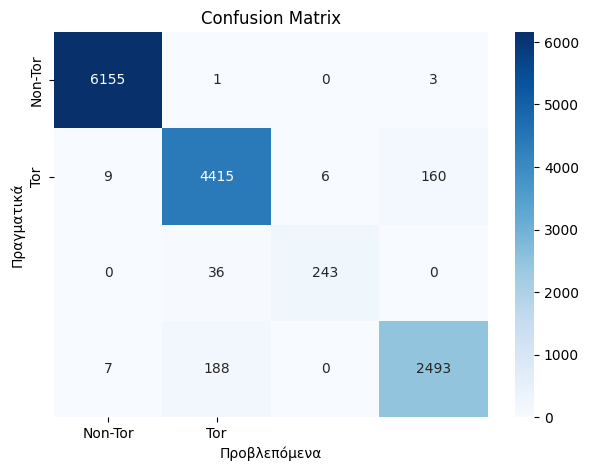

In [23]:
# Εμφάνιση του Confusion Matrix με χρήση Heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Tor', 'Tor'], yticklabels=['Non-Tor', 'Tor'])
plt.xlabel('Προβλεπόμενα')
plt.ylabel('Πραγματικά')
plt.title('Confusion Matrix')
plt.show()